In [1]:
import pandas as pd
from barplots import barplots
from experiment.load_complete_string_ppi import load_complete_string_ppi

In [2]:
df = pd.read_csv("approximated_walks.csv")
df["Max Neighbours"].fillna(value=1375, inplace=True)
df = df[df["Max Neighbours"] <= 1375]
df["Max Neighbours"] = [
    str(int(val))
    for val in df["Max Neighbours"].values
]

In [26]:
from scipy.stats import wilcoxon
results = []

for metric in df.columns[4:]:
    p_value = wilcoxon(
        df[df.run_type == "test"][df["Max Neighbours"] == "1375"][metric],
        df[df.run_type == "test"][df["Max Neighbours"] == "10"][metric],
    )[1]
    results.append({
        "Metric": metric,
        "P-value": p_value
    })
pd.DataFrame(results)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


,Metric,P-value
0,F1 Score Binary,0.012515
1,F1 Score Micro,0.006910
2,F1 Score Macro,0.006910
3,Accuracy,0.006910
4,Balanced Accuracy,0.006910
5,AUROC,0.074462
6,AUPRC,0.092601


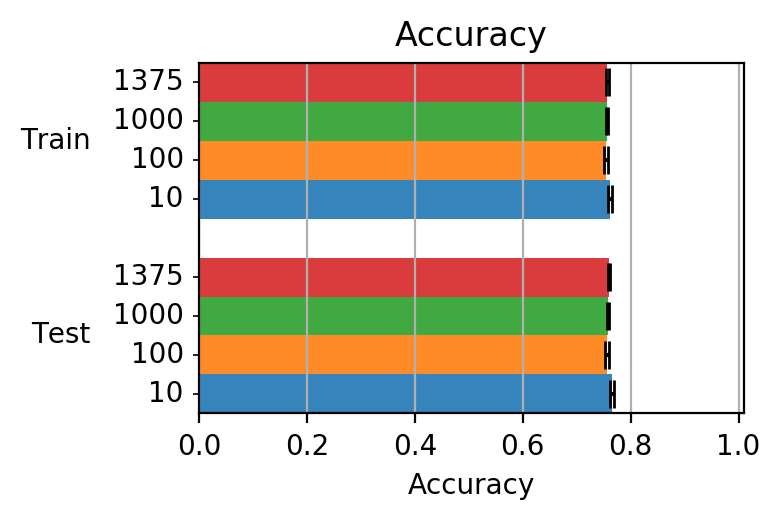

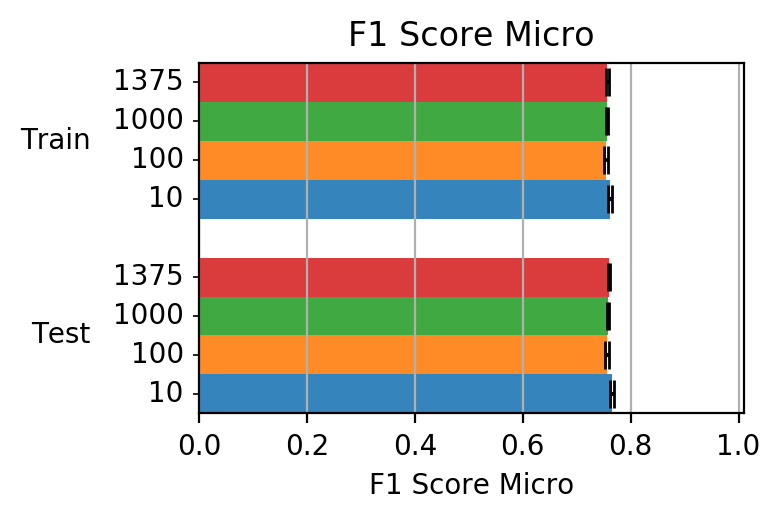

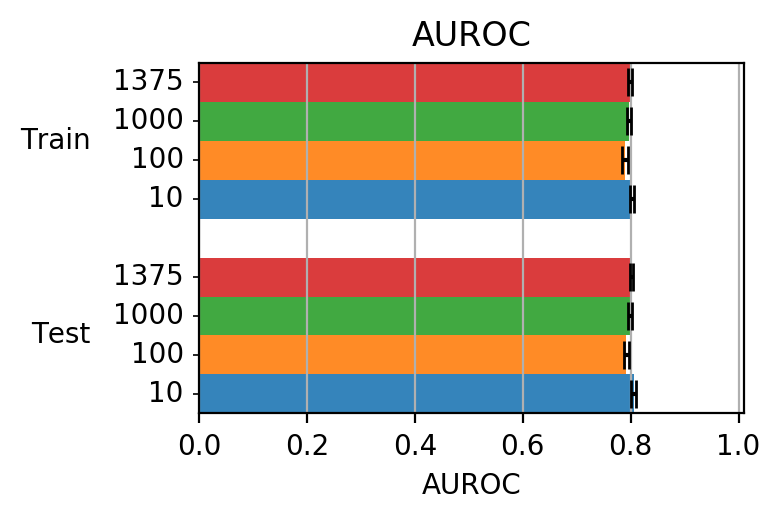

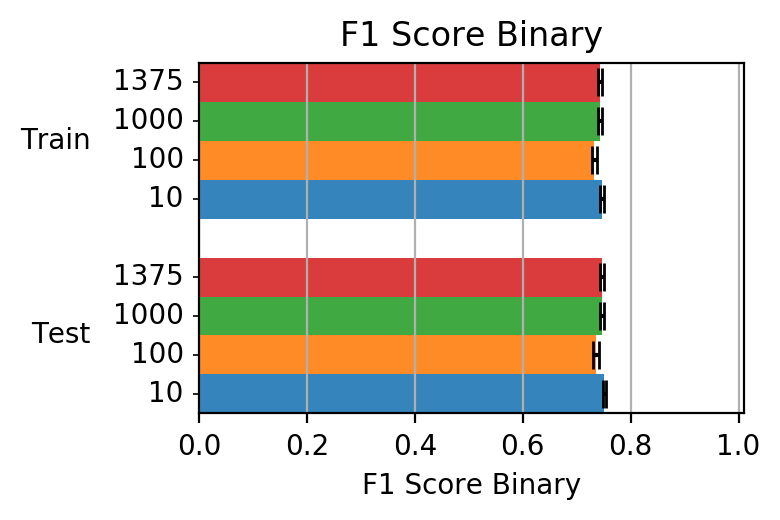

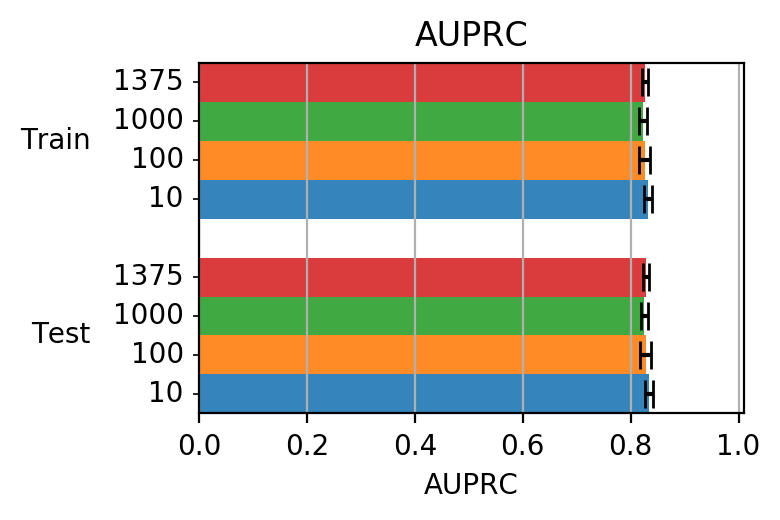

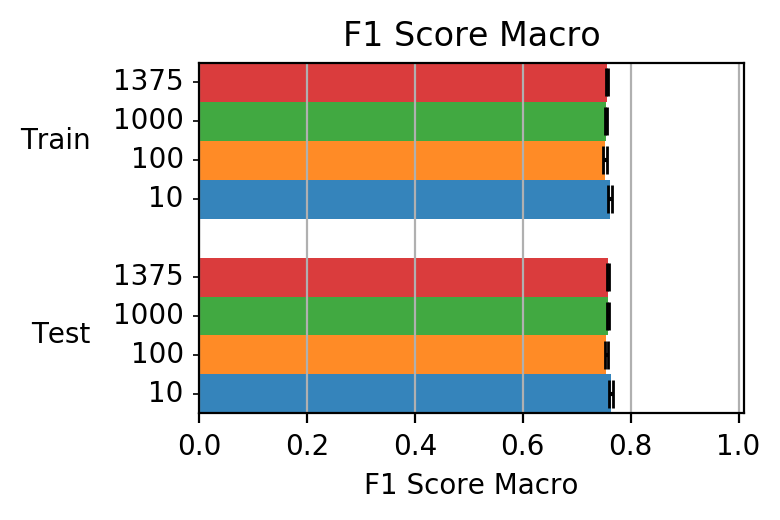

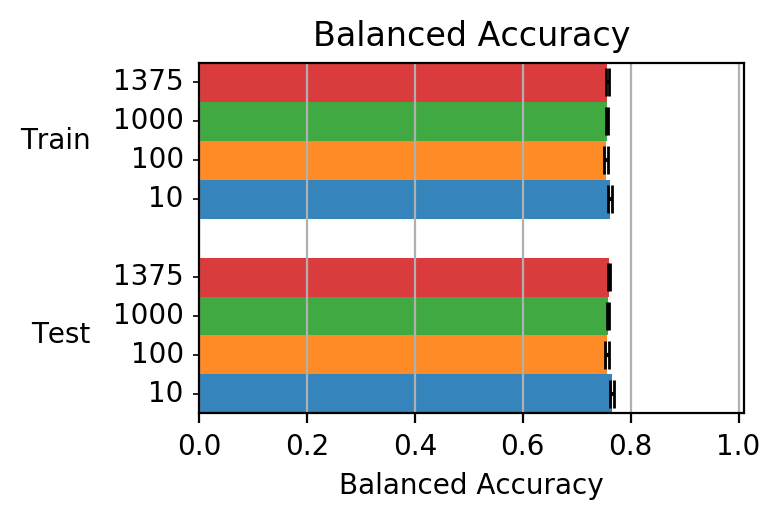

In [8]:
_ = barplots(
    df,
    groupby=["run_type", "Max Neighbours"],
    show_legend=False,
    height=4,
    orientation="horizontal"
)